# PyTao advanced usage

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

In [2]:
from pytao import Tao, TaoModel, util, run_tao
from pytao.tao_ctypes.evaluate import evaluate_tao
import os
?TaoModel

## Inititialize Tao

In [3]:
# Point to local installation
BASE_DIR=os.environ['ACC_ROOT_DIR'] 
print('Bmad installation: ', BASE_DIR)

# Pick an example init
root = os.path.join(BASE_DIR, 'tao/examples/csr_beam_tracking/')

INPUT_FILE = root+'tao.init'
assert os.path.exists(INPUT_FILE), INPUT_FILE

Bmad installation:  /Users/slepicka/sandbox/git-lume/bmad/bmad_dist_2020_1110


## run_tao

In [4]:
M=run_tao(input_file=INPUT_FILE, ploton=True)
M

## evaluate_tao

In [5]:
?evaluate_tao

In [6]:
res = evaluate_tao(settings={'csr_param:write_csr_wake':True,
                            'csr_param:ds_track_step':0.001}, 
                   input_file=root+'tao.init', 
                   run_commands=['set global track_type=beam'],
                   expressions = ['lat::orbit.x[FF.PIP02A]', 'beam::norm_emit.x[end]'],
                   ploton=False, 
                   archive_csr_wake=True,
                   beam_archive_path = '.')
res

{'lat::orbit.x[FF.PIP02A]': 0.0,
 'beam::norm_emit.x[end]': 9.9982316502565e-07,
 'beam_archive': '/Users/slepicka/sandbox/git-lume/pytao-git/examples/bmad_beam_9aa4c282c0284ba3259a8ae2bd688be2.h5'}

In [7]:
from pmd_beamphysics import ParticleGroup, particle_paths
from h5py import File
afile = res['beam_archive']
h5 = File(afile, 'r')
ppaths = particle_paths(h5)
ppaths

/Users/slepicka/mc/envs/lume/lib/python3.7/site-packages/pmd_beamphysics/plot.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('white')


['/data/00001/particles/',
 '/data/00002/particles/',
 '/data/00003/particles/',
 '/data/00004/particles/']

In [8]:
list(h5)

['csr_wake', 'data', 'expressions', 'input', 'settings']

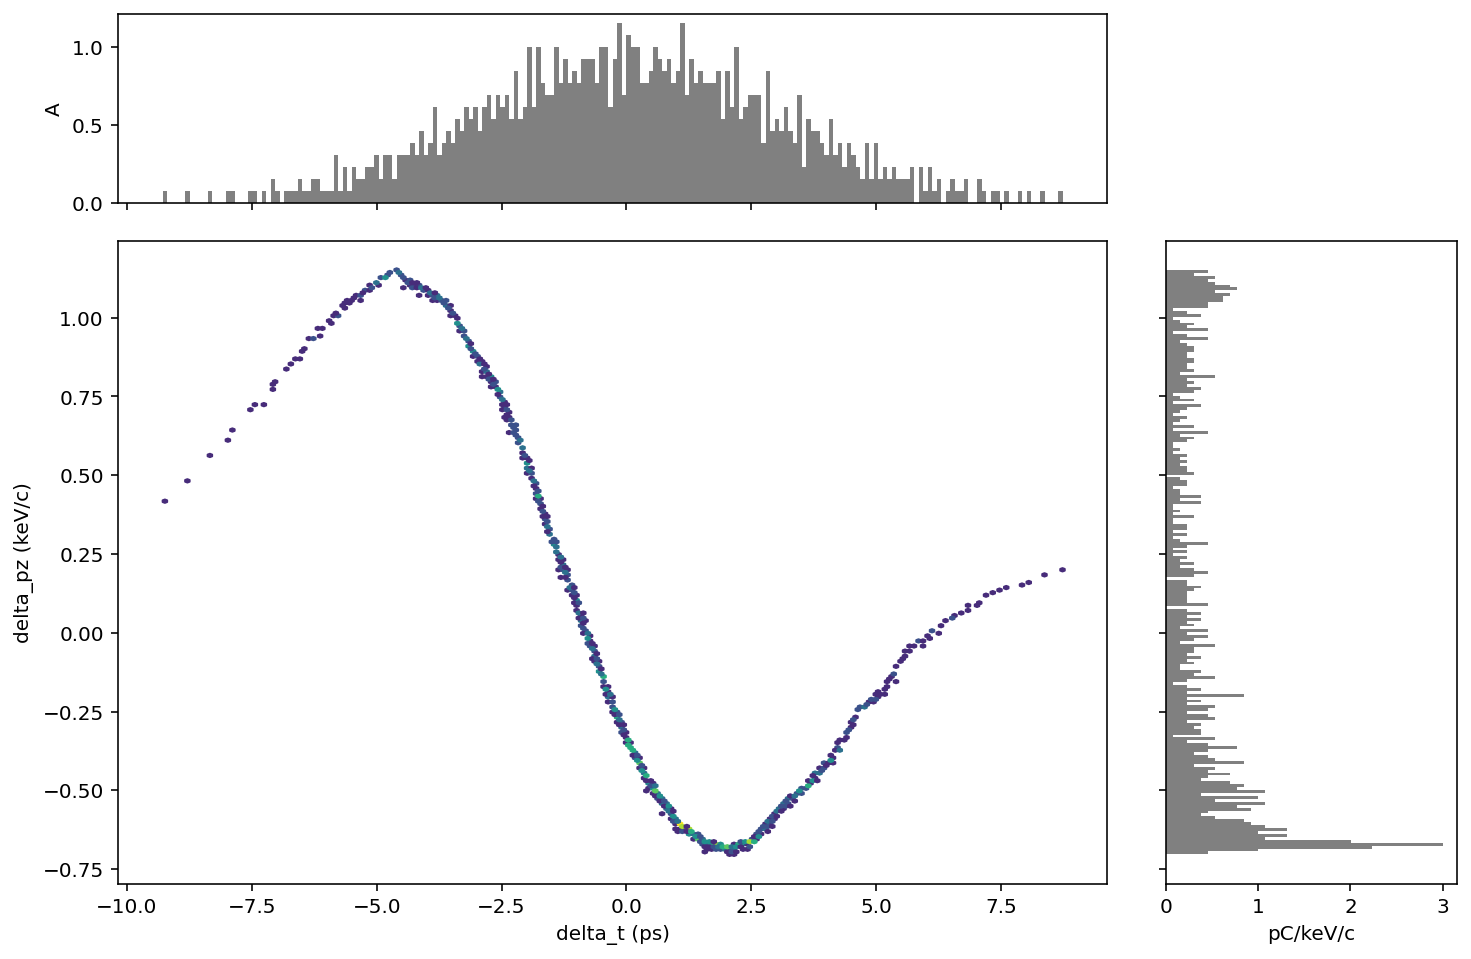

In [9]:
P = ParticleGroup(h5[ppaths[-1]])
P.plot('delta_t', 'delta_pz', bins=200)

In [10]:
os.remove(afile)

## evaluate examples

In [11]:
M.evaluate('lat::orbit.x[end]')

0.0

## csr_wake diagnostic file

In [12]:
from pytao.misc.csr import read_csr_wake_data_h5, process_csr_wake_data
import numpy as np

In [13]:
cdat = read_csr_wake_data_h5(h5, 'csr_wake')

In [14]:
cdat.keys()

dict_keys(['2:FF.PIP00B', '3:FF.BEN01', '4:FF.PIP01', '5:FF.BEN02', '6:FF.PIP02A'])

In [15]:
# This is the actual data
dat = cdat['3:FF.BEN01']['data']
dat.shape

(134, 40, 5)

In [16]:
# This will process into a more useful form for data analysis
pdat = process_csr_wake_data(cdat)

?process_csr_wake_data

In [17]:
from pytao.misc.csr_plot import plot_csr_wake, plot_csr_stats
from pytao.misc.csr import csr_wake_stats_at_step

In [18]:
from ipywidgets import interact
def plot1(step=0):
    plot_csr_wake(pdat, step=step)
nstep = len(pdat['z'])
interact(plot1, step=(0, nstep-1, 1) )

interactive(children=(IntSlider(value=0, description='step', max=449), Output()), _dom_classes=('widget-intera…

<function __main__.plot1(step=0)>

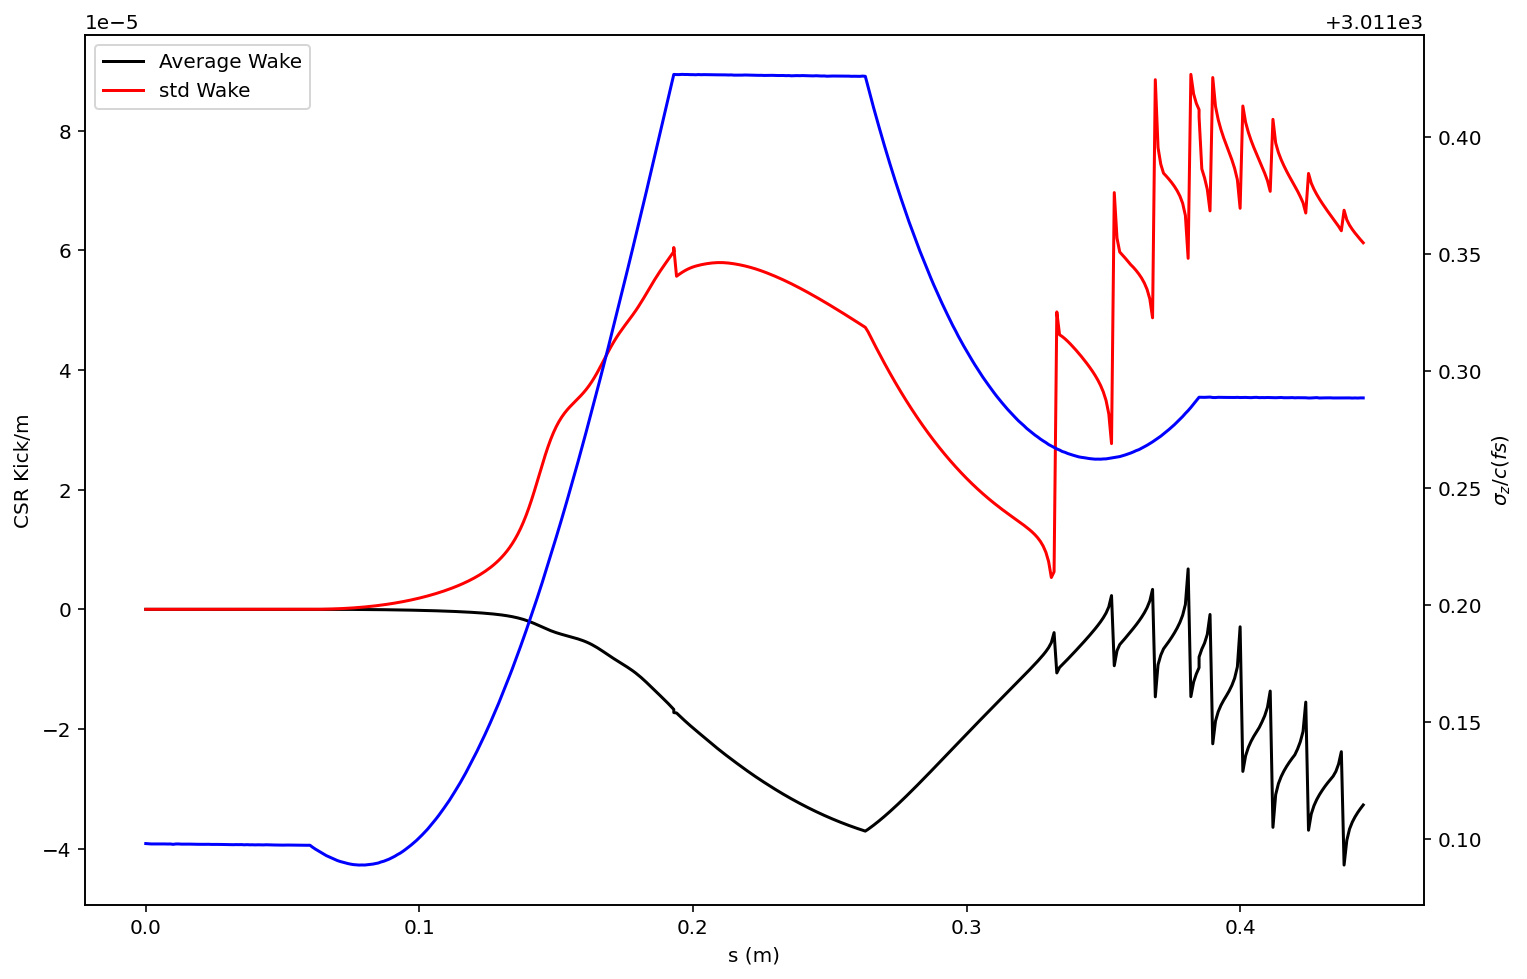

In [19]:
# Another convenience plot
plot_csr_stats(pdat)  